In [390]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [391]:
#get data
ticker= 'SPY'
spy = yf.download(ticker, start='2000-01-01', end='2024-05-14')

[*********************100%%**********************]  1 of 1 completed


In [392]:
#get data
ticker = 'QQQ'
qqq = yf.download(ticker, start='2000-01-01', end='2024-05-13')

[*********************100%%**********************]  1 of 1 completed


In [393]:
spy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6129 entries, 2000-01-03 to 2024-05-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6129 non-null   float64
 1   High       6129 non-null   float64
 2   Low        6129 non-null   float64
 3   Close      6129 non-null   float64
 4   Adj Close  6129 non-null   float64
 5   Volume     6129 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 335.2 KB


In [394]:
qqq.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6128 entries, 2000-01-03 to 2024-05-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6128 non-null   float64
 1   High       6128 non-null   float64
 2   Low        6128 non-null   float64
 3   Close      6128 non-null   float64
 4   Adj Close  6128 non-null   float64
 5   Volume     6128 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 335.1 KB


<AxesSubplot: xlabel='Date'>

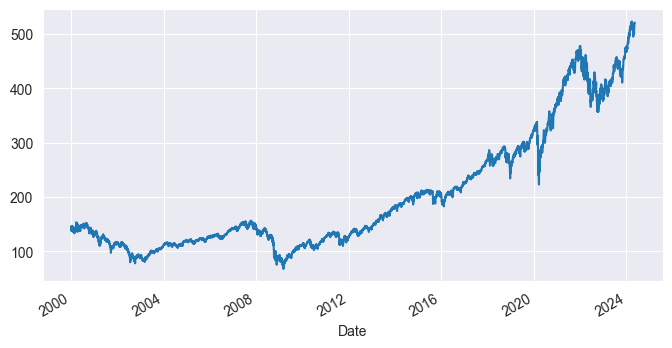

In [395]:
spy['Close'].plot(figsize=(8,4))

<AxesSubplot: xlabel='Date'>

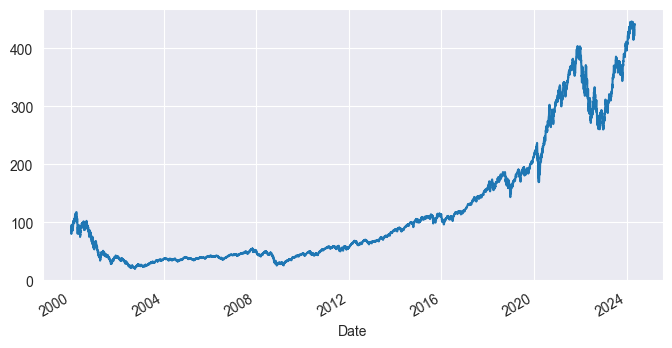

In [396]:
qqq['Close'].plot(figsize=(8,4))

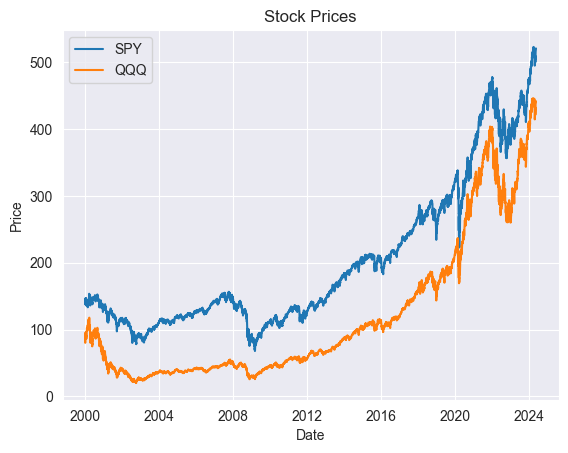

In [397]:
plt.plot(spy['Close'], label='SPY')
plt.plot(qqq['Close'], label='QQQ')
plt.title('Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [398]:
#custom statistics -- using the aggregate() method also allows one to pass custom functions
spy['Adj Close'].aggregate([min, np.mean, np.std, np.median, max]).round(2)

min        51.02
mean      173.73
std       119.37
median    109.91
max       523.17
Name: Adj Close, dtype: float64

In [399]:
qqq['Adj Close'].aggregate([min, np.mean, np.std, np.median, max]).round(2)

min        17.11
mean      113.29
std       108.32
median     61.51
max       446.38
Name: Adj Close, dtype: float64

In [400]:
spy.pct_change().round(3).tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-07,0.007,0.004,0.006,0.001,0.001,0.112
2024-05-08,-0.004,-0.002,-0.003,0.000,0.000,-0.200
2024-05-09,0.004,0.005,0.003,0.006,0.006,0.038
2024-05-10,0.009,0.005,0.006,0.001,0.001,0.197
2024-05-13,0.001,0.000,0.000,0.000,0.000,-0.298


In [401]:
qqq.pct_change().round(3).tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-06,0.007,0.009,0.009,0.011,0.011,-0.377
2024-05-07,0.008,0.004,0.007,0.000,0.000,0.025
2024-05-08,-0.007,-0.001,-0.005,-0.001,-0.001,-0.197
2024-05-09,0.006,0.000,0.002,0.002,0.002,-0.013
2024-05-10,0.005,0.006,0.005,0.002,0.002,0.101


<AxesSubplot: >

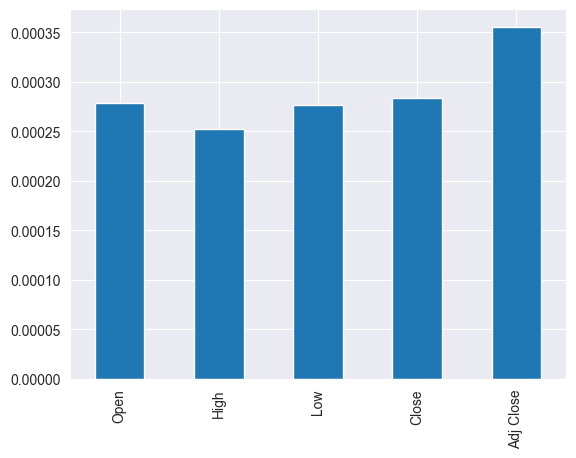

In [402]:
#drop volume column
spy.drop(columns='Volume', inplace=True)
spy.pct_change().mean().plot(kind='bar')

<AxesSubplot: >

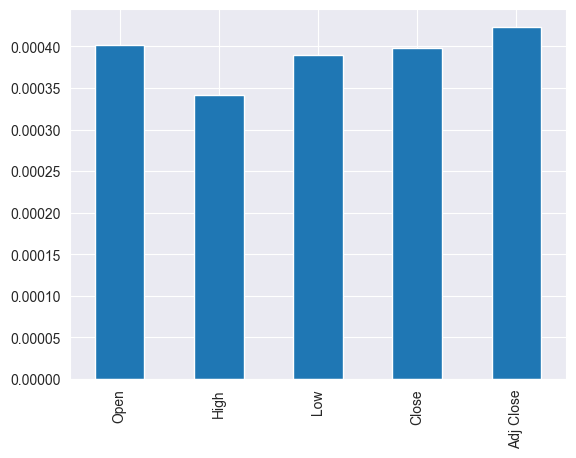

In [403]:
qqq.drop(columns='Volume', inplace=True)
qqq.pct_change().mean().plot(kind='bar')

In [404]:
#alternative to percentage returns 
spy_rets = np.log(spy / spy.shift(1)) 
spy_rets.tail().round(3)

,Open,High,Low,Close,Adj Close
Date,,,,,
2024-05-07,0.007,0.004,0.006,0.001,0.001
2024-05-08,-0.004,-0.002,-0.003,0.000,0.000
2024-05-09,0.004,0.005,0.003,0.006,0.006
2024-05-10,0.009,0.005,0.006,0.001,0.001
2024-05-13,0.001,0.000,0.000,0.000,0.000


In [405]:
qqq_rets = np.log(qqq / qqq.shift(1))
qqq_rets.tail().round(3)

,Open,High,Low,Close,Adj Close
Date,,,,,
2024-05-06,0.007,0.009,0.009,0.011,0.011
2024-05-07,0.008,0.004,0.007,0.000,0.000
2024-05-08,-0.007,-0.001,-0.005,-0.001,-0.001
2024-05-09,0.006,0.000,0.002,0.002,0.002
2024-05-10,0.005,0.006,0.005,0.002,0.002


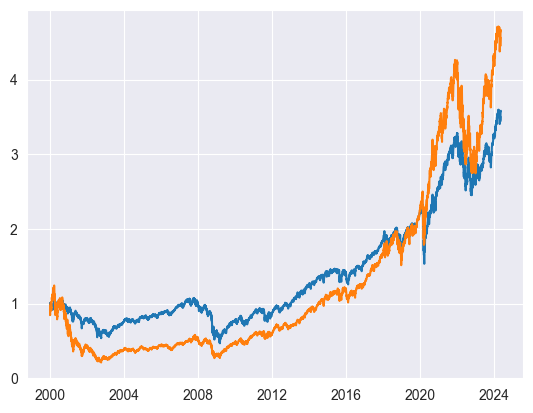

In [406]:
#plot log cumulative returns 
plt.plot(spy_rets['Close'].cumsum().apply(np.exp))
plt.plot(qqq_rets['Close'].cumsum().apply(np.exp))

In [407]:
#data resample 1 week 
spy.resample('1w', label='right').last().tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2024-04-21,499.440002,500.459991,493.859985,495.160004,495.160004
2024-04-28,506.350006,509.880005,505.700012,508.260010,508.260010
2024-05-05,511.160004,512.549988,508.559998,511.290009,511.290009
2024-05-12,521.809998,522.640015,519.590027,520.840027,520.840027
2024-05-19,522.559998,522.669983,519.739990,520.909973,520.909973


In [408]:
spy.resample('1m', label='right').last().tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2024-01-31,488.619995,489.079987,482.859985,482.880005,481.384338
2024-02-29,508.070007,509.739990,505.350006,508.079987,506.506256
2024-03-31,523.210022,524.609985,522.780029,523.070007,523.070007
2024-04-30,508.559998,509.559998,501.980011,501.980011,501.980011
2024-05-31,522.559998,522.669983,519.739990,520.909973,520.909973


In [409]:
qqq.resample('1w', label='right').last().tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2024-04-14,441.100006,442.239990,436.880005,438.269989,438.269989
2024-04-21,422.220001,422.750000,413.070007,414.649994,414.649994
2024-04-28,427.619995,432.549988,426.920013,431.000000,431.000000
2024-05-05,434.440002,436.480011,432.619995,435.480011,435.480011
2024-05-12,442.540009,444.309998,440.500000,442.059998,442.059998


In [410]:
qqq.resample('1m', label='right').last().tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2024-01-31,420.850006,422.869995,416.790009,416.970001,416.419373
2024-02-29,438.230011,440.089996,435.019989,439.000000,438.420288
2024-03-31,444.779999,445.640015,443.649994,444.010010,444.010010
2024-04-30,431.149994,432.559998,424.510010,424.589996,424.589996
2024-05-31,442.540009,444.309998,440.500000,442.059998,442.059998


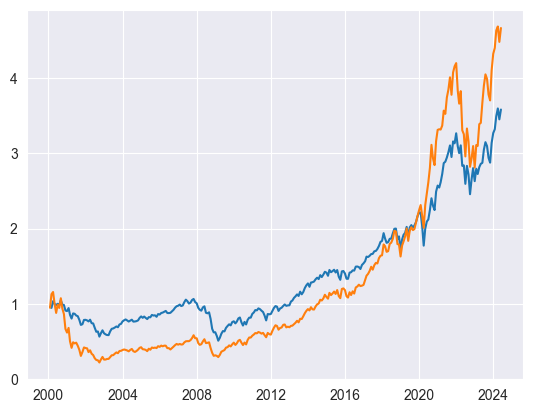

In [411]:
#plot cumulative log returns over time
plt.plot(spy_rets['Close'].cumsum().apply(np.exp).resample('1m', label='right').last())
plt.plot(qqq_rets['Close'].cumsum().apply(np.exp).resample('1m', label='right').last())

In [412]:
spy

,Open,High,Low,Close,Adj Close
Date,,,,,
2000-01-03,148.250000,148.250000,143.875000,145.437500,93.591148
2000-01-04,143.531250,144.062500,139.640625,139.750000,89.931114
2000-01-05,139.937500,141.531250,137.250000,140.000000,90.092041
2000-01-06,139.625000,141.500000,137.750000,137.750000,88.644112
2000-01-07,140.312500,145.750000,140.062500,145.750000,93.792244
...,...,...,...,...,...
2024-05-07,517.559998,518.570007,516.450012,517.140015,517.140015
2024-05-08,515.260010,517.739990,515.140015,517.190002,517.190002
2024-05-09,517.380005,520.210022,516.710022,520.169983,520.169983


Rolling Statistics

In [413]:
sym = spy['Close']
data = pd.DataFrame(sym).dropna()
window = 20

In [414]:
data['min'] = sym.rolling(window=window).min()

In [415]:
data['mean'] = sym.rolling(window=window).mean()

In [416]:
data['std'] = sym.rolling(window=window).std()

In [417]:
data['median'] = sym.rolling(window=window).median()

In [418]:
data['max'] = sym.rolling(window=window).max()

In [419]:
data['ewma'] = sym.ewm(halflife=0.5, min_periods=window).mean()

In [420]:
data.dropna().tail()

,Close,min,mean,std,median,max,ewma
Date,,,,,,,
2024-05-07,517.140015,495.160004,506.556502,6.511521,505.220001,518.000000,516.554807
2024-05-08,517.190002,495.160004,506.710002,6.731669,505.220001,518.000000,517.031204
2024-05-09,520.169983,495.160004,506.818501,6.937554,505.220001,520.169983,519.385288
2024-05-10,520.840027,495.160004,507.318002,7.573582,505.220001,520.840027,520.476342
2024-05-13,520.909973,495.160004,508.141000,8.120129,505.529999,520.909973,520.801565


<AxesSubplot: xlabel='Date'>

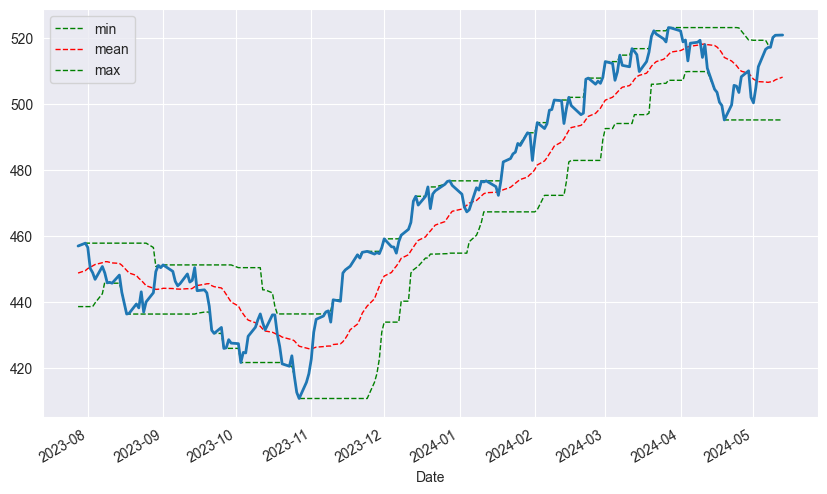

In [421]:
ax = data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10,6), style=['g--', 'r--', 'g--'], lw=1.0)
data['Close'].iloc[-200:].plot(ax=ax, lw=2.0)

In [422]:
data['SMA1'] = data['Close'].rolling(window=42).mean()

In [423]:
data['SMA2'] = data['Close'].rolling(window=252).mean()

In [424]:
data[['Close', 'SMA1', 'SMA2']].tail()

,Close,SMA1,SMA2
Date,,,
2024-05-07,517.140015,512.354524,461.807778
2024-05-08,517.190002,512.484762,462.222263
2024-05-09,520.169983,512.696429,462.655755
2024-05-10,520.840027,512.793095,463.084287
2024-05-13,520.909973,512.910714,463.515953


<AxesSubplot: xlabel='Date'>

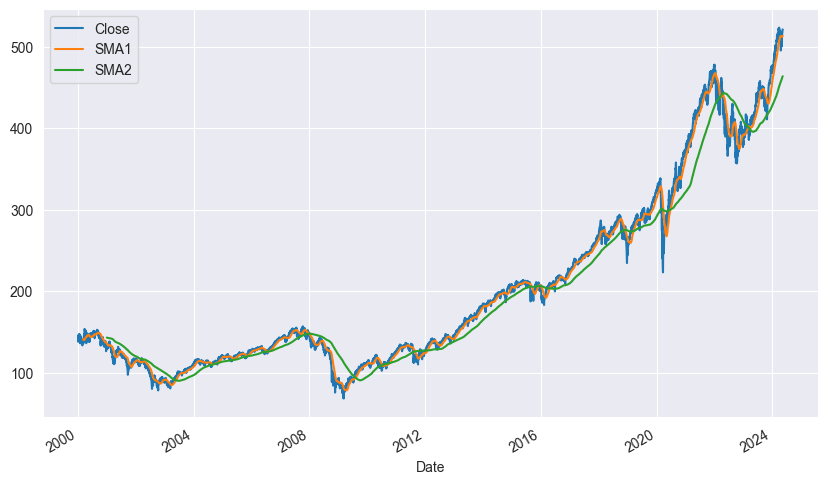

In [425]:
data[['Close', 'SMA1', 'SMA2']].plot(figsize=(10,6))

In [426]:
data.dropna(inplace=True)

In [427]:
data['position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)

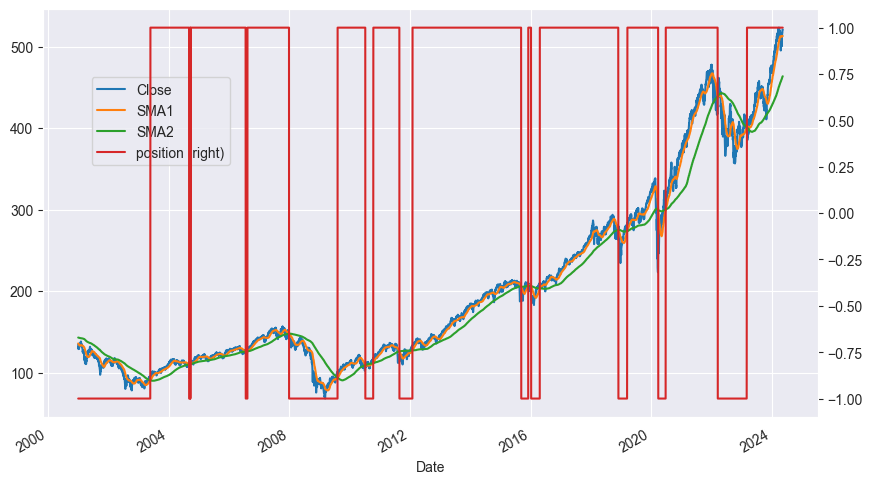

In [428]:
ax = data[['Close', 'SMA1', 'SMA2', 'position']].plot(figsize=(10,6), secondary_y = 'position')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

Regression Analysis

In [429]:
ticker= '^VIX'
vix = yf.download(ticker, start='2000-01-01', end='2024-05-14')

[*********************100%%**********************]  1 of 1 completed


In [430]:
data = pd.concat([spy['Close'], vix['Close']], axis=1)
data.columns = ['SPY', 'VIX']
data.tail()

,SPY,VIX
Date,,
2024-05-07,517.140015,13.23
2024-05-08,517.190002,13.00
2024-05-09,520.169983,12.69
2024-05-10,520.840027,12.55
2024-05-13,520.909973,13.60


array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
      dtype=object)

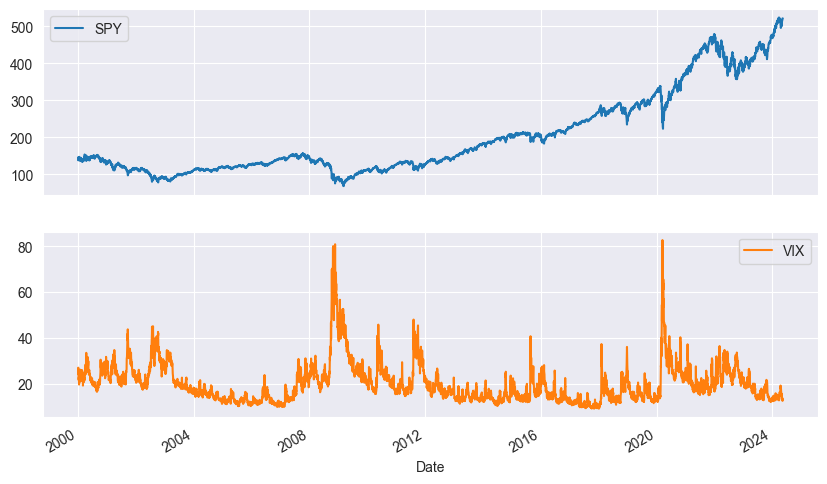

In [431]:
data.plot(subplots=True, figsize=(10,6))

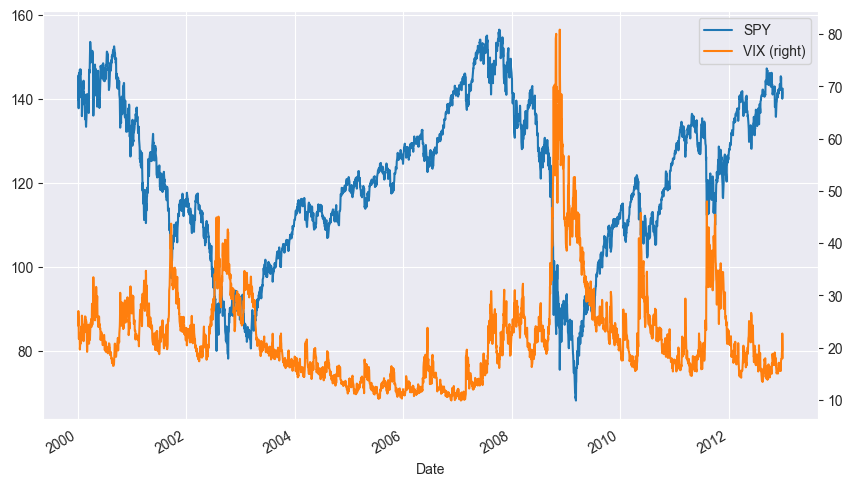

In [432]:
data.loc[:'2012-12-31'].plot(secondary_y= 'VIX', figsize=(10,6));

Log Returns

In [433]:
rets = np.log(data / data.shift(1)) #This calculates the log returns

In [434]:
rets.tail()

,SPY,VIX
Date,,
2024-05-07,0.001103,-0.019462
2024-05-08,0.000097,-0.017538
2024-05-09,0.005745,-0.024135
2024-05-10,0.001287,-0.011094
2024-05-13,0.000134,0.080349


In [435]:
rets.dropna(inplace=True)

array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
      dtype=object)

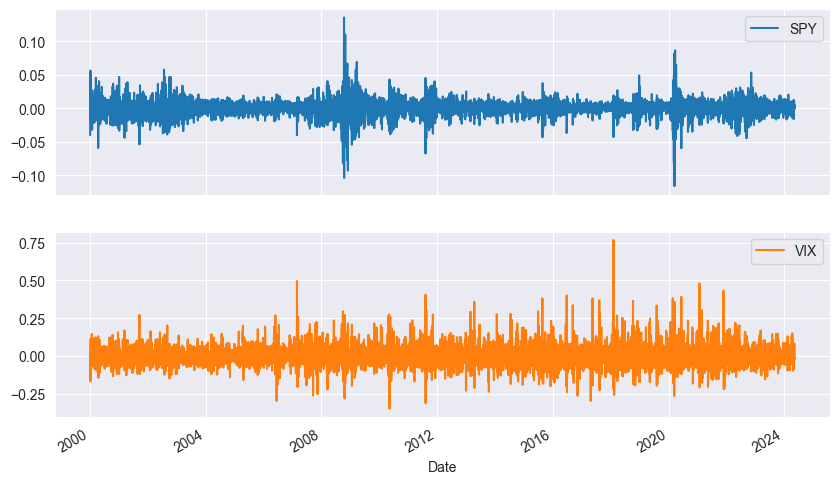

In [436]:
rets.plot(subplots=True, figsize=(10,6))

array([[<AxesSubplot: xlabel='SPY', ylabel='SPY'>,
        <AxesSubplot: xlabel='VIX', ylabel='SPY'>],
       [<AxesSubplot: xlabel='SPY', ylabel='VIX'>,
        <AxesSubplot: xlabel='VIX', ylabel='VIX'>]], dtype=object)

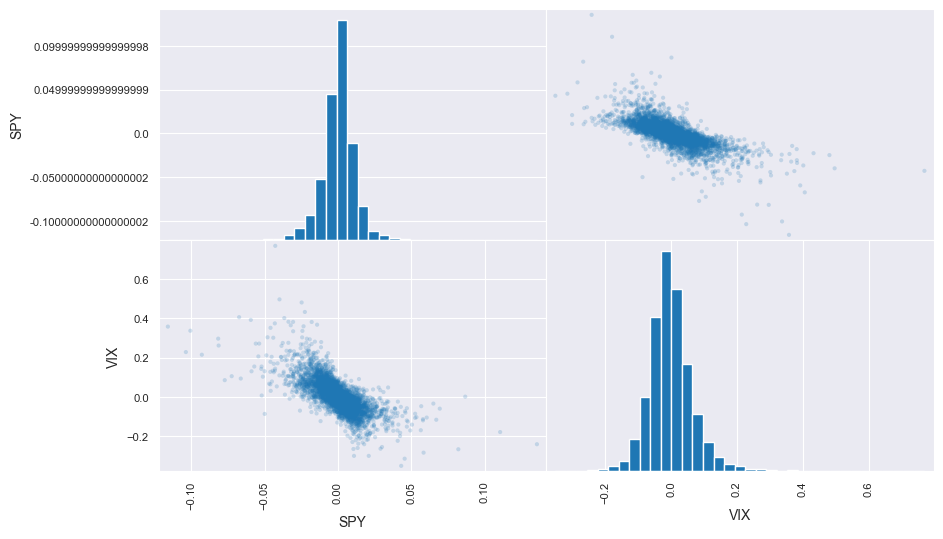

In [437]:
pd.plotting.scatter_matrix(rets, alpha = 0.2, diagonal='hist', hist_kwds={'bins':35}, figsize=(10,6))                      
                           

In [438]:
#Ols Regression
reg = np.polyfit(rets['SPY'], rets['VIX'], deg=1) #This implements a linear OSL Regression

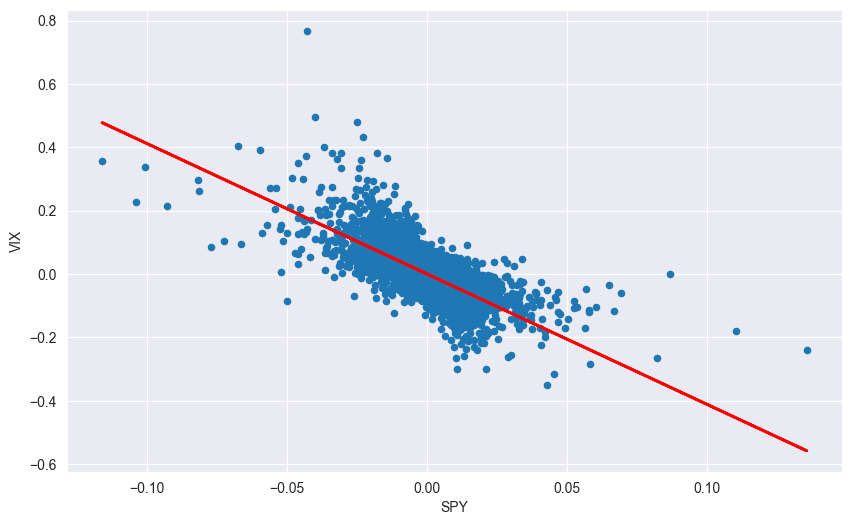

In [439]:
ax = rets.plot(kind='scatter', x='SPY', y='VIX', figsize=(10,6)) #This Plots the log returns as a scatter plot
ax.plot(rets['SPY'], np.polyval(reg, rets['SPY']), 'r', lw=2)

In [440]:
#Correlation
rets.corr()

,SPY,VIX
SPY,1.000000,-0.724928
VIX,-0.724928,1.000000


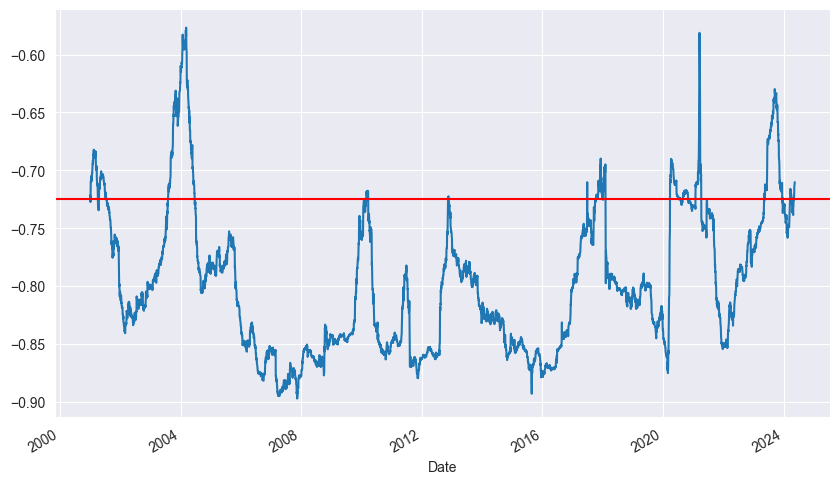

In [441]:
ax = rets['SPY'].rolling(window=252).corr(rets['VIX']).plot(figsize=(10,6))
ax.axhline(rets.corr().iloc[0,1], c='r')